# PCA
主成分分析（Principal Component Analysis）

* 是一个非监督学习的算法
- 主要用于数据的降维
- 通过降维，可以发现更便于人类理解的特性
- 其他应用：可视化；去噪

目标：求w，使得$f(x)=\frac{1}{m}\sum_{i=1}^{m}{(X_1^iw_1+X_2^iw_2+\ldots+X_n^iw_n)^2}$最大

$$\nabla f=
\begin{pmatrix}
\frac{\partial f}{\partial w_1} \\
\frac{\partial f}{\partial w_2} \\
\vdots  \\
\frac{\partial f}{\partial w_n}
\end{pmatrix}
=\frac{2}{m}
\begin{pmatrix}
\sum_{i=1}^{m}{(X^iw)}X_1^i  \\
\sum_{i=1}^{m}{(X^iw)}X_2^i  \\
\vdots \\
\sum_{i=1}^{m}{(X^iw)}X_n^i  
\end{pmatrix}
=\frac{2}{m}\cdot{X^T}(Xw)
$$

# 使用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size = 100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0,10.,size=100)

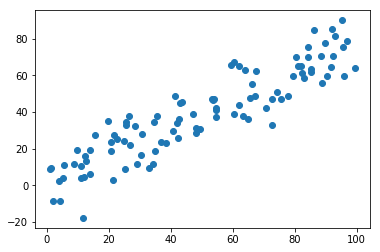

In [5]:
plt.scatter(X[:,0],X[:,1])

In [6]:
def demean(X):
    return X - np.mean(X,axis = 0)

In [7]:
X_demean = demean(X)

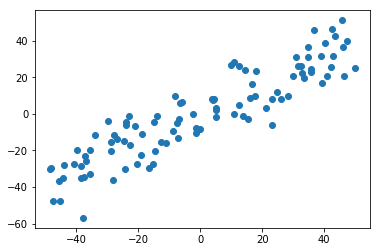

In [8]:
plt.scatter(X_demean[:,0],X_demean[:,1])

In [9]:
np.mean(X_demean[:,0])

5.755396159656812e-15

In [10]:
np.mean(X_demean[:,1])

-2.4549251520511462e-14

### 梯度上升法

In [11]:
def f(w,X):
    return np.sum(X.dot(w)**2)/len(X)

In [12]:
def df_math(w,X):
    return X.T.dot(X.dot(w))*2./len(X)

In [13]:
def df_debug(w,X,epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1,X)-f(w_2,X))/(2*epsilon)
    return res

In [14]:
def direction(w):
    return w / np.linalg.norm(w)
def gradient_ascent(df,X,initial_w,eta,n_iters = 1e4,epsilon=1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter<n_iters:
        gradient = df(w,X)
        last_w = w
        w = w+eta*gradient
        w = direction(w) #注意1：每次求一个单位向量
        if(abs(f(w,X)-f(last_w,X))<epsilon):
            break
            
        cur_iter += 1
    return w

In [16]:
initial_w = np.random.random(X.shape[1]) #注意2：不能从0向量开始
initial_w

array([0.54755268, 0.94148793])

In [17]:
eta = 0.001 #注意3：不能使用standard标准化数据

In [26]:
w=gradient_ascent(df_debug,X_demean,initial_w,eta)

In [27]:
gradient_ascent(df_math,X_demean,initial_w,eta)

array([0.77889928, 0.62714903])

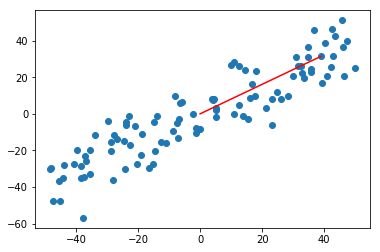

In [31]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*50],[0,w[1]*50],color='r')

In [48]:
X2 = np.empty((100,2))
X2[:,0] = np.linspace(1.,100.,100)
X2[:,1] = 0.75 * X2[:,0] + 3.

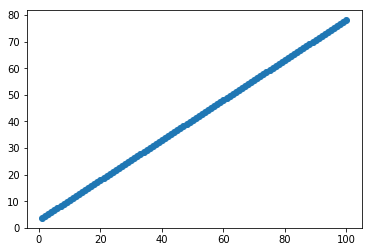

In [49]:
plt.scatter(X2[:,0],X2[:,1])

In [50]:
X2_demean = demean(X2)
w2 = gradient_ascent(df_math,X2_demean,initial_w,eta)
w2

array([0.79999981, 0.60000025])

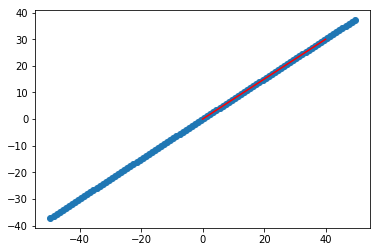

In [52]:
plt.scatter(X2_demean[:,0],X2_demean[:,1])
plt.plot([0,w2[0]*50],[0,w2[1]*50],color='r')